# KNN

KNN searches the memorized training observations for the K instances that most closely resemble (closest to) the new instance and assigns to it the their most common class.

The KNN classifier:
 * Non-parametric - makes no explicit assumptions about the functional form of h : X -> Y / data distribution
 * Instance-based learning -  chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase
 * K would be the hyperparameter

KNN has computationally expensive testing phase which is impractical in industry settings. Additionally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.

[Kevin's Blog](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)

## Assumtions

* Standartization - independent variables should be standardized before calcuating the distances
* Can be used for regression - by taking the average of the K nearest points
* For categorical variables, create N (not N-1) dummy variables

[Listendata.com](https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html)


In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# pre-process data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y,columns=['Species'])

def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [7]:
# combine data
iris = pd.concat([iris_data,iris_target],axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Visualize data

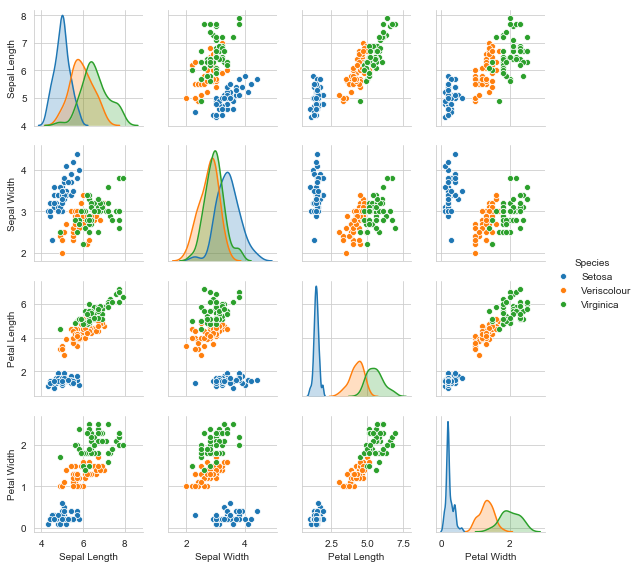

In [9]:
sns.pairplot(iris, hue='Species', height=2)

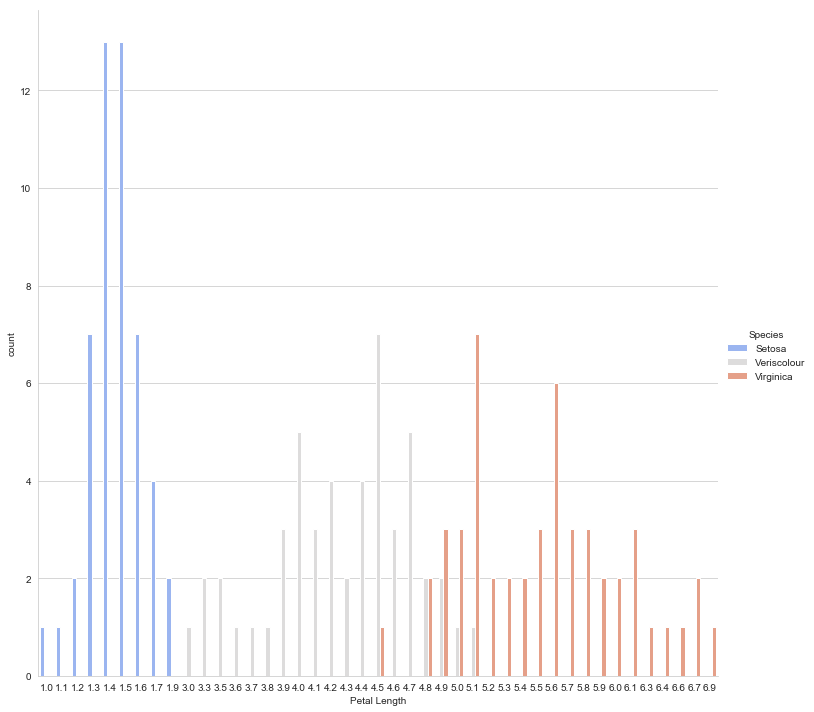

In [12]:
sns.catplot('Petal Length', data=iris, kind="count", hue='Species', palette='coolwarm', height=10)

## Train KNN model

Text(0, 0.5, 'Testing Accuracy')

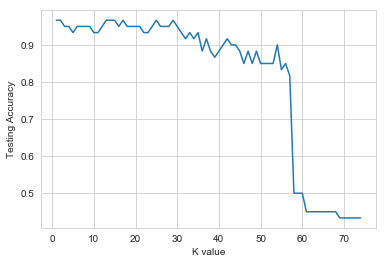

In [16]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

# play with K
k_range = range(1,75)

accuracy = []
for k in k_range:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
